In [7]:
import pandas as pd 
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from textblob import TextBlob, Word
import numpy as np
from nltk.stem import SnowballStemmer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from textblob import TextBlob
import sklearn.feature_extraction.text as text
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
import seaborn

In [11]:
dataReviews = pd.read_csv('Reviews.csv')

In [12]:
dataReviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [13]:
dataReviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [14]:
dataReviews.groupby('UserId')['ProductId'].count().sort_values(ascending = False)

UserId
A3OXHLG6DIBRW8    448
A1YUL9PCJR3JTY    421
AY12DBB0U420B     389
A281NPSIMI1C2R    365
A1Z54EM24Y40LL    256
                 ... 
A2HROKQO0GA5AF      1
A2HROR28DMJV2W      1
A2HRR8CO2Y20G8      1
A2HRSML93IK9TR      1
AZZZOVIBXHGDR       1
Name: ProductId, Length: 256059, dtype: int64

In [15]:
dataReviews["Text"] = dataReviews['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
dataReviews["Text"].head()

0    i have bought several of the vitality canned d...
1    product arrived labeled as jumbo salted peanut...
2    this is a confection that has been around a fe...
3    if you are looking for the secret ingredient i...
4    great taffy at a great price. there was a wide...
Name: Text, dtype: object

In [16]:
stop = stopwords.words('english')
len(stop)

179

In [17]:
dataReviews['Text'] = dataReviews['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
dataReviews['Text'].head()

0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanuts.....
2    confection around centuries. light, pillowy ci...
3    looking secret ingredient robitussin believe f...
4    great taffy great price. wide assortment yummy...
Name: Text, dtype: object

In [18]:
# dataReviews['Text'] = dataReviews['Text'].apply(lambda x: str(TextBlob(x).correct()))
# dataReviews['Text'].head(5)

In [19]:
dataReviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled jumbo salted peanuts.....
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","confection around centuries. light, pillowy ci..."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,looking secret ingredient robitussin believe f...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy great price. wide assortment yummy...


5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

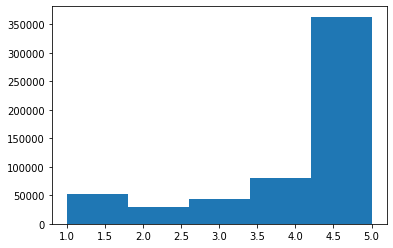

In [23]:

dataReviews.Score.hist(bins = 5, grid = False)
dataReviews['Score'].value_counts()

In [30]:
score_1 = dataReviews[dataReviews['Score'] == 1].sample(n = 29743)
score_2 = dataReviews[dataReviews['Score'] == 2].sample(n = 29743)
score_3 = dataReviews[dataReviews['Score'] == 3].sample(n = 29743)
score_4 = dataReviews[dataReviews['Score'] == 4].sample(n = 29743)
score_5 = dataReviews[dataReviews['Score'] == 5].sample(n = 29743)


In [32]:
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)


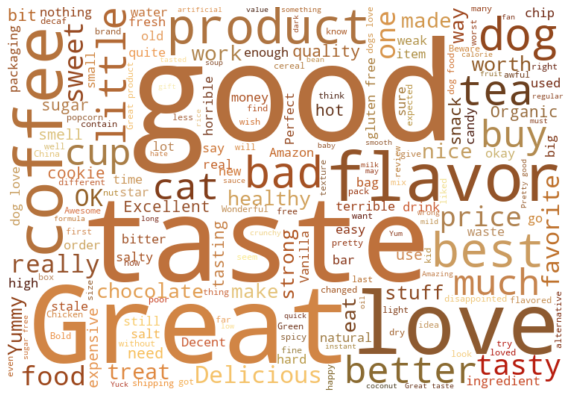

In [89]:
from wordcloud import WordCloud, ImageColorGenerator
from wordcloud import STOPWORDS
reviews_str = reviews_sample.Summary.str.cat()
from PIL import Image
mask = np.array(Image.open("food_review.jpg"))


wordcloud = WordCloud(background_color='white',mode="RGBA", mask=mask).generate(reviews_str)
image_colors = ImageColorGenerator(mask)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")


plt.show()


In [59]:
negative_reviews = reviews_sample[reviews_sample['Score'].isin([1, 2])]
positive_reviews = reviews_sample[reviews_sample['Score'].isin([4, 5])]
negative_reviews_str = negative_reviews.Summary.str.cat()
positive_reviews_str = positive_reviews.Summary.str.cat()

In [60]:
wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='white').generate(positive_reviews_str)
wordcloud_negative

Text(0.5, 1.0, 'Reviews with Negative Scores')

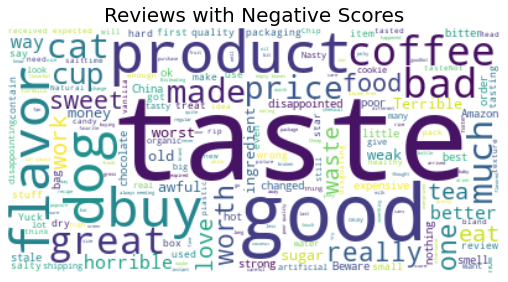

In [61]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores',fontsize=20)

Text(0.5, 1.0, 'Reviews with Negative Scores')

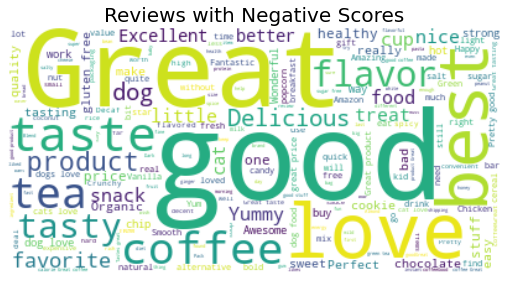

In [62]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_positive,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Positive Scores',fontsize=20)

In [64]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
emptyline=[]
analyzer = SentimentIntensityAnalyzer()
for row in dataReviews['Text']:
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)

In [65]:
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head(5)

,neg,neu,pos,compound
0,0.000,0.517,0.483,0.9413
1,0.129,0.762,0.110,-0.1027
2,0.160,0.578,0.262,0.7926
3,0.000,0.868,0.132,0.4404
4,0.000,0.369,0.631,0.9468


In [68]:
df_c = pd.concat([dataReviews.reset_index(drop=True), df_sentiments], axis=1)
df_c.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.517,0.483,0.9413
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled jumbo salted peanuts.....,0.129,0.762,0.110,-0.1027
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","confection around centuries. light, pillowy ci...",0.160,0.578,0.262,0.7926


In [72]:
df_c['Sentiment'] = np.where(df_c['compound'] >= 0 , 'Positive','Negative')
df_c

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.517,0.483,0.9413,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled jumbo salted peanuts.....,0.129,0.762,0.110,-0.1027,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","confection around centuries. light, pillowy ci...",0.160,0.578,0.262,0.7926,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,looking secret ingredient robitussin believe f...,0.000,0.868,0.132,0.4404,Positive
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy great price. wide assortment yummy...,0.000,0.369,0.631,0.9468,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,great sesame chicken..this good better restura...,0.000,0.444,0.556,0.9300,Positive
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,i'm disappointed flavor. chocolate notes espec...,0.256,0.605,0.138,-0.6240,Negative
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"stars small, give 10-15 one training session. ...",0.000,0.805,0.195,0.8271,Positive
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,best treats training rewarding dog good groomi...,0.062,0.281,0.657,0.9690,Positive


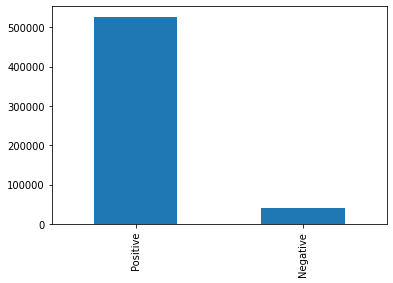

In [75]:
result=df_c['Sentiment'].value_counts().plot.bar()
# We just took a sample of 568454 reviews and completed sentiment analysis. If you look, more than 900 (>90%) reviews are positive, which is
# really good for any business.


In [2]:
data = pd.read_csv("review_label.csv")
data.head()

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,outcome
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,positive
1,1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled jumbo salted peanuts.....,negative
2,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","confection around centuries. light, pillowy ci...",positive
3,3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,looking secret ingredient robitussin believe f...,negative
4,4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy great price. wide assortment yummy...,positive


In [ ]:
data 